1. Найти с помощью NumPy SVD для матрицы

$\begin{pmatrix}
1 & 2 & 0\\ 
0 & 0 & 5\\ 
3 & -4 & 2\\ 
1 & 6 & 5\\ 
0 & 1 & 0
\end{pmatrix}
$

2. Для матрицы из предыдущего задания найти:

    а) евклидову норму;
    
    б) норму Фробениуса.

In [123]:
import numpy as np

a = np.array([[1, 2, 0], [0, 0, 5], [3, -4, 2], [1, 6, 5], [0, 1, 0]])
u, d, v_t = np.linalg.svd(a) 
print(f'U matrix:\n {u}\n')
print(f'D matrix:\n {d}\n')
print(f'V transposed matrix:\n {v_t}')

U matrix:
 [[ 0.17056501  0.15680918 -0.53077508 -0.79905375 -0.16158397]
 [ 0.39287016 -0.52933945  0.6134793  -0.43375771  0.03082495]
 [-0.14366152 -0.82449256 -0.52379105  0.14049848  0.07400343]
 [ 0.88843702  0.06074346 -0.24655277  0.37755832 -0.06042632]
 [ 0.08125046  0.10831843 -0.08231425 -0.10524851  0.98173958]]

D matrix:
 [8.82486885 6.14060608 2.53271528]

V transposed matrix:
 [[ 0.07116451  0.71702467  0.69340553]
 [-0.36737824  0.66514082 -0.65009301]
 [-0.92734505 -0.20847855  0.31075368]]


норма Эвклида равна первому элементу матрицы D:
$\left \| A \right \|_{E}=\mu_{1}.$

$\left \| A \right \|_{E} = 8.82486885$

С помощью numpy.

In [124]:
np.linalg.norm(a, ord=2)

8.824868854820444

Норма Фробениуса, если мы знаем сингулярное разложение равна:
$\left \| A \right \|_{F}=\sqrt{\sum_{k=1}^{r}\mu_{k}^{2}}.$

In [125]:
frob_norm = np.math.sqrt(sum((i**2 for i in d))) 
frob_norm

11.045361017187263

$\left \| A \right \|_{F}=11.045361017187263$

С помощью numpy.

In [126]:
np.linalg.norm(a)

11.045361017187261

In [127]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [128]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [129]:
print(iris.data[:10,:])
print(iris.target)
print(iris.target_names)
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [130]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [131]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Делаем сингулярное разложение. Смотрим на жлементы которые вносят меньше 5% и избавляемся от них. Восстанавливаем новую матрицу d_new.

In [132]:
u, d, v_t = np.linalg.svd(df)
print(d)
d_percent = d / d[0]
d[d_percent < 0.05] = 0
d_new = np.zeros([len(u),len(v_t)])
for i in range(len(d)):
    d_new[i,i] = d[i]
d_new[:10,:]

[95.95991387 17.76103366  3.46093093  1.88482631]


array([[95.95991387,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

вычисляем новые признаки перемножая $U\cdot d\_new\cdot V^T$, получаем пониженный ранг.

In [133]:
x_new = u.dot(d_new).dot(v_t)
df_dim_reduced = pd.DataFrame(x_new)
df_dim_reduced.corr()

,0,1,2,3
0,1.000000,-0.068012,0.882924,0.861090
1,-0.068012,1.000000,-0.528478,-0.565839
2,0.882924,-0.528478,1.000000,0.999004
3,0.861090,-0.565839,0.999004,1.000000


In [134]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [135]:
import seaborn as sns

In [136]:
df1 = df
df1['target'] = data.target

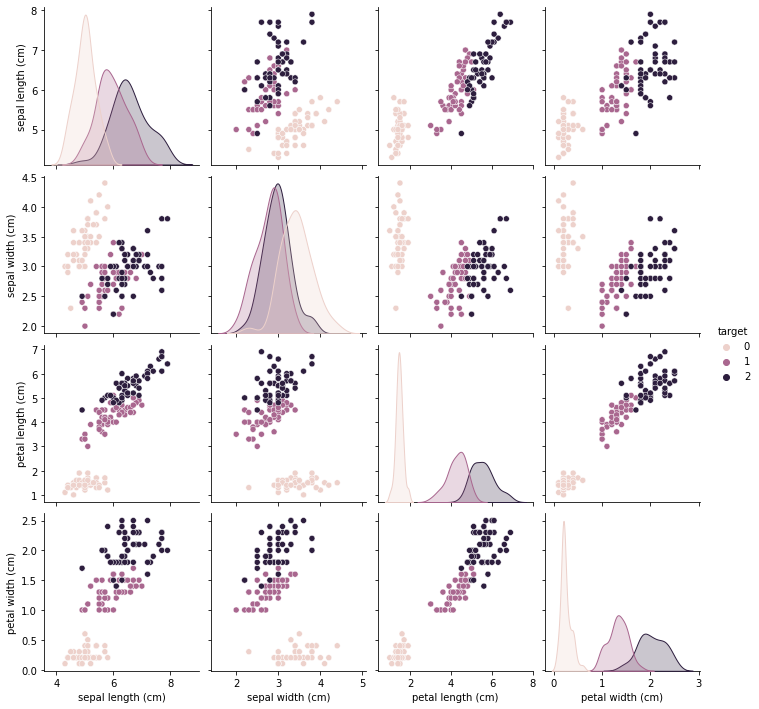

In [137]:
sns.pairplot(df1, hue='target')

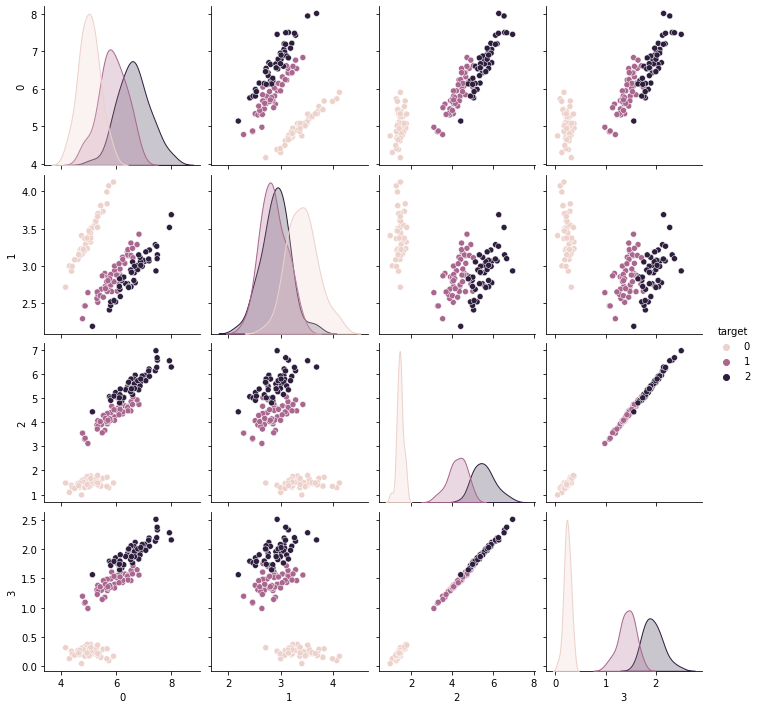

In [138]:
df1_new = df_dim_reduced
df1_new['target'] = data.target
sns.pairplot(df1_new, hue='target')